In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset_location = '/content/drive/My Drive/kaggle_datasets/covid.zip'

In [0]:
!unzip /content/drive/My\ Drive/kaggle_datasets/covid.zip

Streaming output truncated to the last 5000 lines.
  inflating: final_dataset/train/OTHERS/IM-0490-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0491-0001-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0491-0001-0002.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0491-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0492-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0493-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0494-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0495-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0496-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0497-0001-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0497-0001-0002.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0497-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0499-0001-0001.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0499-0001-0002.jpeg  
  inflating: final_dataset/train/OTHERS/IM-0499-0001.jpeg  
  inflating: final_

In [0]:
!ls

drive  final_dataset  sample_data


In [0]:
import os
base_dir = 'final_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_others_dir = os.path.join(train_dir, 'OTHERS')
validation_covid_dir = os.path.join(validation_dir, 'COVID19')
validation_others_dir = os.path.join(validation_dir, 'OTHERS')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_others_dir = os.path.join(test_dir, 'OTHERS')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [0]:
import cv2
import numpy as np
image = cv2.imread('/content/final_dataset/test/COVID19/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
print(image.shape)

(1163, 1165, 3)


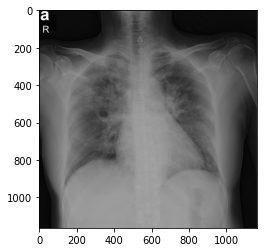

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [0]:
#need to calculate what to use instead of 300*300
#validation directory has only 26 datasets so need to do something about that too
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (300, 300), batch_size = 50, class_mode = 'binary')
validation_generator = train_datagen.flow_from_directory(test_dir, target_size = (300, 300), batch_size = 50, class_mode = 'binary')

Found 5402 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [0]:
import keras
class customCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc')>0.99):
      print("99 percent accuracy reached, so stopping")
      self.model.stop_training = True
mycallback = customCallback()

In [0]:
#building the neural newtork
from keras import layers
from keras import models
from keras import backend as K
K.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (300, 300, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)      

In [0]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch = 20, epochs = 20, validation_data = validation_generator, validation_steps = 50, callbacks = [mycallback])


Epoch 1/20
20/20 [==============================] - 38s 2s/step - loss: 0.1154 - acc: 0.9810 - val_loss: 0.1654 - val_acc: 0.9700
Epoch 2/20
20/20 [==============================] - 34s 2s/step - loss: 0.1083 - acc: 0.9740 - val_loss: 0.1068 - val_acc: 0.9708
Epoch 3/20
20/20 [==============================] - 33s 2s/step - loss: 0.0903 - acc: 0.9740 - val_loss: 0.1425 - val_acc: 0.9816
Epoch 4/20
20/20 [==============================] - 34s 2s/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0275 - val_acc: 0.9716
Epoch 5/20
20/20 [==============================] - 33s 2s/step - loss: 0.0947 - acc: 0.9690 - val_loss: 0.0322 - val_acc: 0.9744
Epoch 6/20
20/20 [==============================] - 34s 2s/step - loss: 0.0675 - acc: 0.9800 - val_loss: 0.0630 - val_acc: 0.9776
Epoch 7/20
20/20 [==============================] - 33s 2s/step - loss: 0.0551 - acc: 0.9780 - val_loss: 0.0441 - val_acc: 0.9832
Epoch 8/20
20/20 [==============================] - 35s 2s/step - loss: 0.0518 - acc: 0.98